<a href="https://colab.research.google.com/github/Maheshdasi/AIDS/blob/main/Lab10-AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.50,random_state=0)

In [3]:
X.shape

(300, 2)

In [4]:
y_true.shape

(300,)

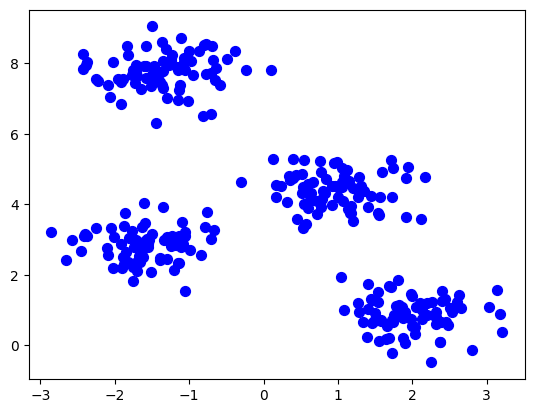

In [5]:
plt.scatter(X[:,0],X[:,1],s=50,color='blue')

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=4)

In [8]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [9]:
y_kmeans_pred = kmeans.predict(X)

In [10]:
centers = kmeans.cluster_centers_
centers

array([[ 0.95415778,  4.39985544],
       [-1.35241261,  7.76731726],
       [ 1.99469693,  0.8727049 ],
       [-1.57480456,  2.84532424]])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans_pred,y_true)

0.25

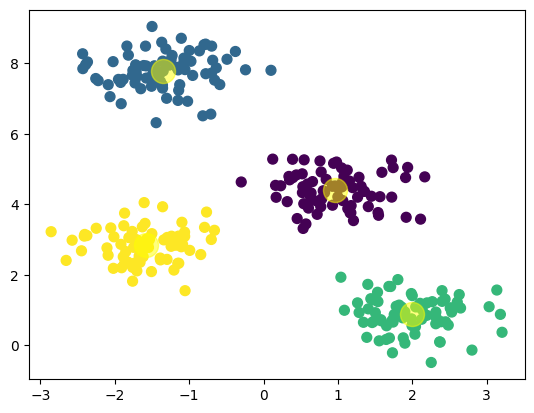

In [12]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans_pred,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

In [13]:
from sklearn.metrics import pairwise_distances_argmin

In [14]:
def find_clusters(X,n_clusters,rseed=2):
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
    labels = pairwise_distances_argmin(X,centers)
    new_centers = np.array([X[labels == i].mean(0)for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers,labels

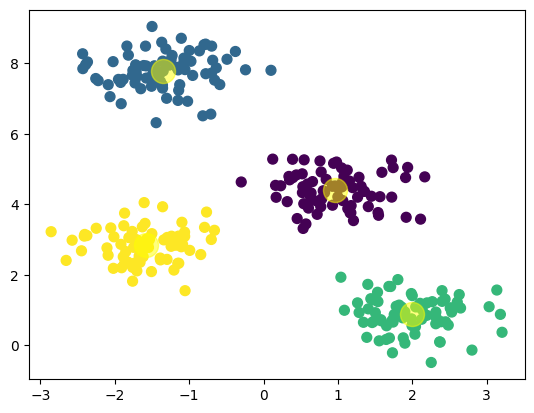

In [15]:
centers, labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_kmeans_pred,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

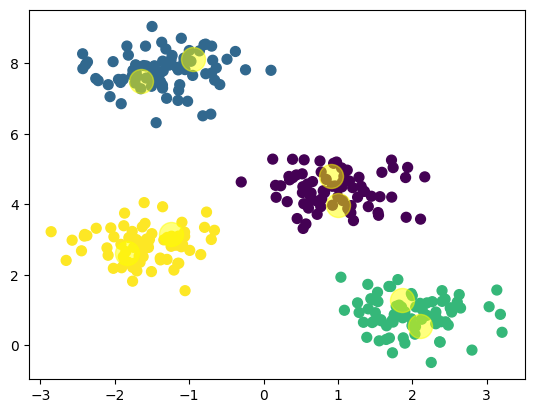

In [16]:
centers, labels = find_clusters(X,8)
plt.scatter(X[:,0],X[:,1],c=y_kmeans_pred,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

In [17]:
from sklearn.datasets import make_moons
X,y=make_moons(200,noise=.03,random_state=0)

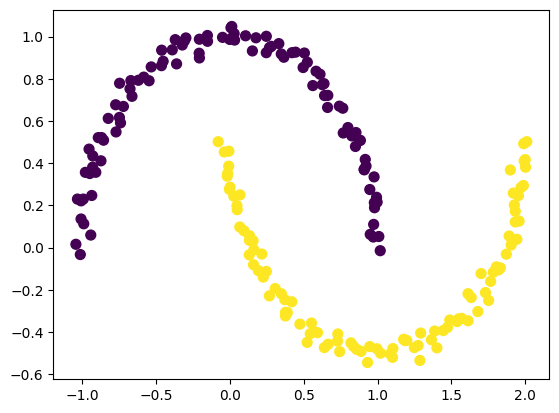

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis');

In [19]:
labels = KMeans(2,random_state=0, n_init=10).fit_predict(X)

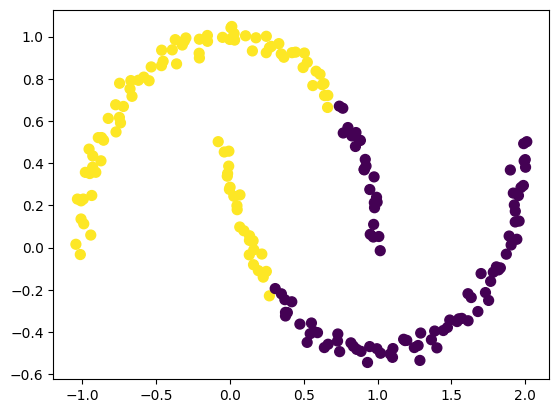

In [20]:
plt.scatter(X[:, 0],X[:,1],c=labels,s=50,cmap='viridis')

In [21]:
from sklearn.cluster import SpectralClustering

In [22]:
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')

In [23]:
labels = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


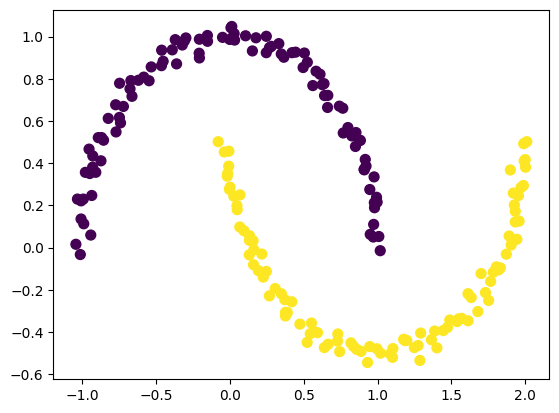

In [24]:
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [25]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=400,centers=4,cluster_std=0.7,random_state=0)
X=X[:,::-1]

In [26]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [27]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k', zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        # Changed '#CCCCC' to '#CCCCCC' to make it a valid RGBA color code
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

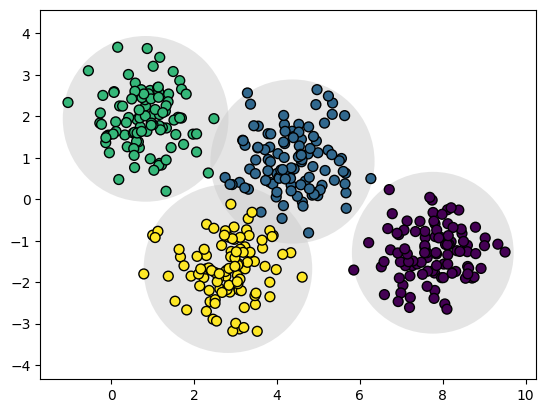

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X)